<a href="https://colab.research.google.com/github/JohnFarlander/ML_Practicals/blob/main/BML_LCA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/bank-additional-full.csv', sep=';')
print("Data loaded successfully!\n")
print(df.head())

Data loaded successfully!

   age        job  marital  ... euribor3m nr.employed   y
0   56  housemaid  married  ...     4.857      5191.0  no
1   57   services  married  ...     4.857      5191.0  no
2   37   services  married  ...     4.857      5191.0  no
3   40     admin.  married  ...     4.857      5191.0  no
4   56   services  married  ...     4.857      5191.0  no

[5 rows x 21 columns]


Basic EDA Analysis

In [ ]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
print("\n--- Target Class Distribution ---")
print(df['y'].value_counts())


--- Target Class Distribution ---
y
no     36548
yes     4640
Name: count, dtype: int64


/tmp/ipython-input-4204206144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital', data=df, palette='coolwarm')


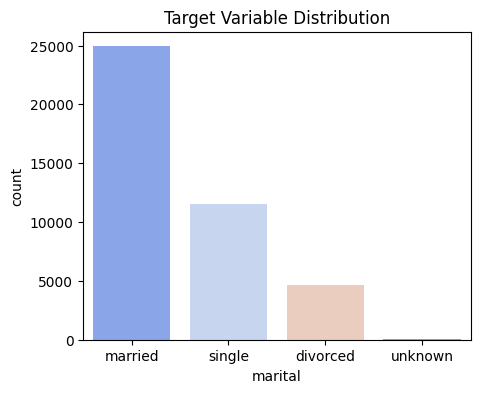

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(x='marital', data=df, palette='coolwarm')
plt.title("Target Variable Distribution")
plt.show()

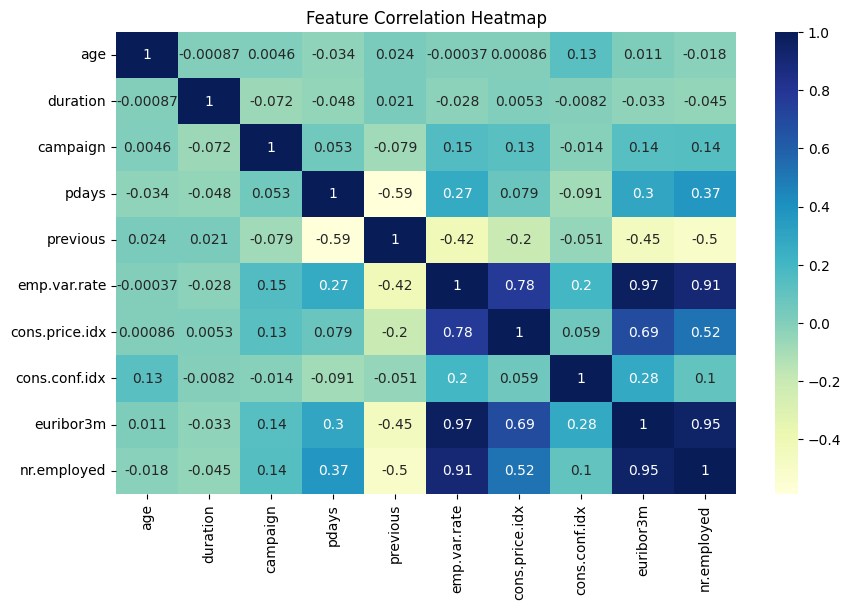

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Encode categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Encode target variable (yes=1, no=0)
y = y.map({'yes':1, 'no':0})

In [ ]:
# Step 7: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Feature scaling (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Random Forest Results 
Accuracy: 0.8907501820830298
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.53      0.29      0.37       935

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



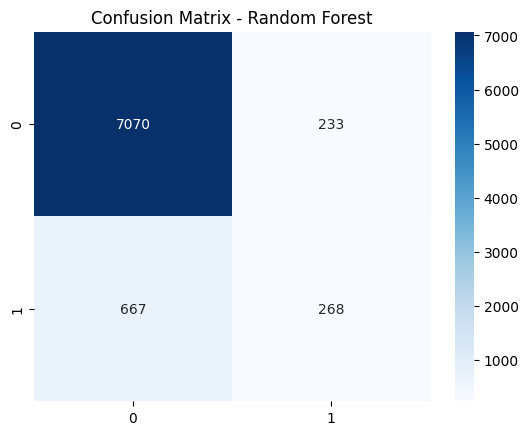

In [32]:
#Step 9: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n Random Forest Results ")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()



 Random Forest Results 
Accuracy: 0.8907501820830298
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.53      0.29      0.37       935

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



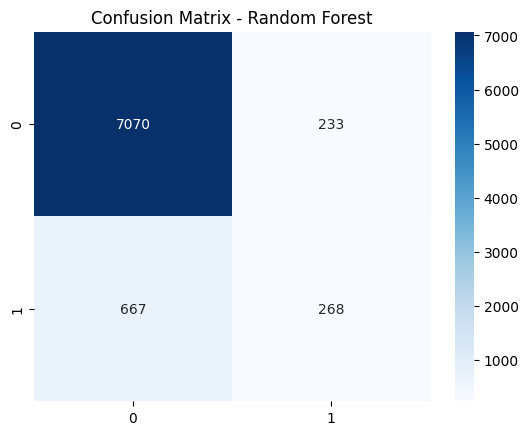

In [30]:
print("\n Random Forest Results ")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

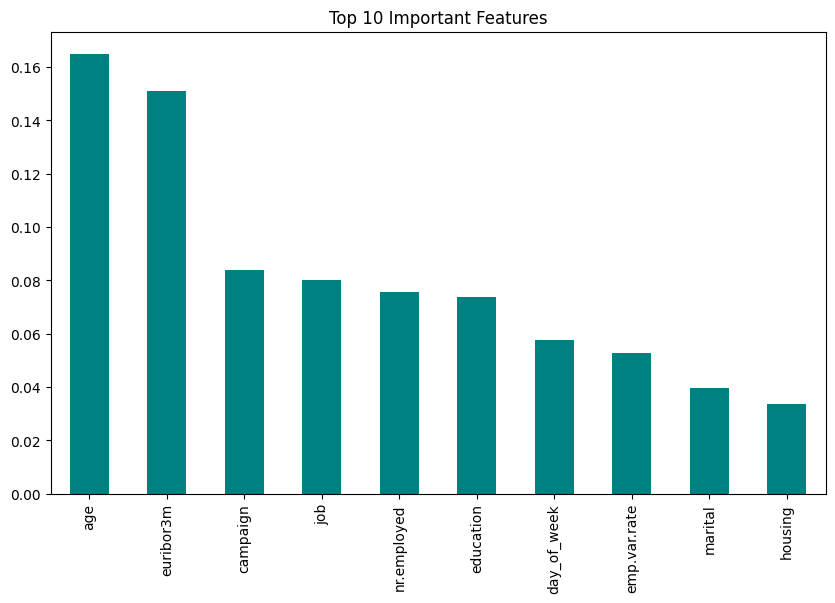

In [ ]:
# Step 10: Feature Importance (from Random Forest)
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Important Features")
plt.show()

In [ ]:
print("Analysis complete!")

Analysis complete!


Comparision of models

Training Logistic Regression ...
Training Decision Tree ...
Training Random Forest ...
Training Gradient Boosting ...
Training XGBoost ...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:38:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training LightGBM ...
[LightGBM] [Info] Number of positive: 3705, number of negative: 29245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training KNN ...
Training Naive Bayes ...

=== Model Accuracy Comparison ===


,Model,Accuracy
3,Gradient Boosting,89.82
4,XGBoost,89.56
2,Random Forest,89.17
6,KNN,88.89
1,Decision Tree,86.10
5,LightGBM,84.33
7,Naive Bayes,83.26
0,Logistic Regression,81.08


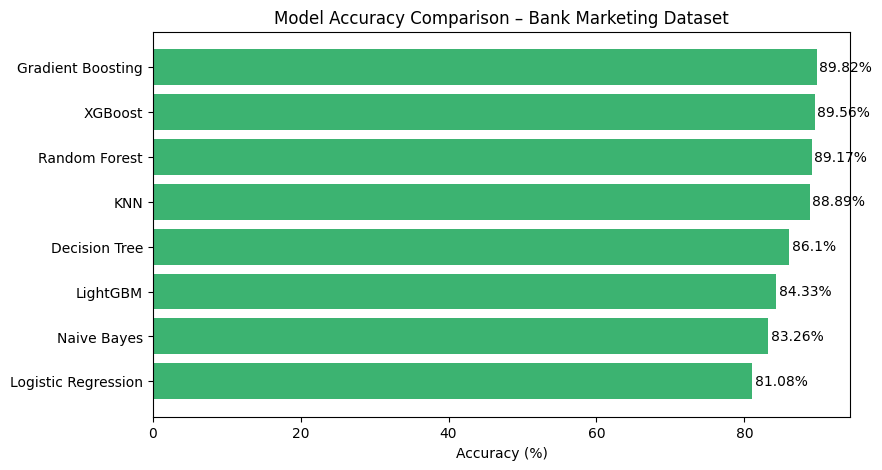


Model Evaluation Summary:

• Logistic Regression → fast & simple baseline but assumes linearity.
• Decision Tree → interpretable but easily overfits.
• Random Forest → best overall; robust, accurate, and less overfitting.
• Gradient Boosting/XGBoost/LightGBM → slightly better with fine tuning but slower.
• KNN → sensitive to scaling, slower prediction.
• Naive Bayes → assumes independent features, not true for marketing data.



In [33]:


# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

results = []
for name, model in models.items():
    print(f"Training {name} ...")

    # Use scaled data for models sensitive to scaling
    if name in ["Logistic Regression", "KNN", "Naive Bayes"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": round(acc * 100, 2)})


df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n=== Model Accuracy Comparison ===")
display(df_results)


plt.figure(figsize=(9, 5))
plt.barh(df_results["Model"], df_results["Accuracy"], color='mediumseagreen')
plt.xlabel("Accuracy (%)")
plt.title("Model Accuracy Comparison – Bank Marketing Dataset")
plt.gca().invert_yaxis()  # Highest accuracy at top
for i, acc in enumerate(df_results["Accuracy"]):
    plt.text(acc + 0.3, i, f"{acc}%", va='center')
plt.show()


print("""
Model Evaluation Summary:

• Logistic Regression → fast & simple baseline but assumes linearity.
• Decision Tree → interpretable but easily overfits.
• Random Forest → best overall; robust, accurate, and less overfitting.
• Gradient Boosting/XGBoost/LightGBM → slightly better with fine tuning but slower.
• KNN → sensitive to scaling, slower prediction.
• Naive Bayes → assumes independent features, not true for marketing data.
""")
